# 平稳性的检验
## 1.时序图
## 1.自相关图

In [52]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import tushare as ts
from statsmodels.tsa import stattools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

import numpy as np
%matplotlib inline

In [2]:
df14 = pd.read_excel('167330+应用时间序列分析案例数据/附录1.4.xls')
df14.index = pd.to_datetime(df14["年份"], format='%Y')
df14[:1]

,年份,纱产量
年份,,
1964-01-01,1964,97.0


In [3]:
df15 = pd.read_excel('167330+应用时间序列分析案例数据/附录1.5.xlsx')
df15.index = pd.to_datetime(df15["time"], format='%Y%m%d')
df15[:1]

,time,milk
time,,
1962-01-01,1962-01-01,589


In [10]:
df16 = pd.read_excel('167330+应用时间序列分析案例数据/附录1.6.xls')
df16.index = pd.to_datetime(df16["年份"], format='%Y')
df16[:1]

,年份,温度
年份,,
1949-01-01,1949,38.8


自相关系数: 
 [ 1.          0.91392186  0.84342292  0.76719398  0.69544891  0.6087441
  0.54377943  0.47630634  0.39543399  0.32092332  0.24205714  0.14651776
  0.05781973 -0.03298495 -0.10840121 -0.16824648 -0.21503145 -0.25968956
 -0.30646831 -0.34603944 -0.38180474 -0.41713209 -0.43279197 -0.43848331
 -0.42629059 -0.41075027]


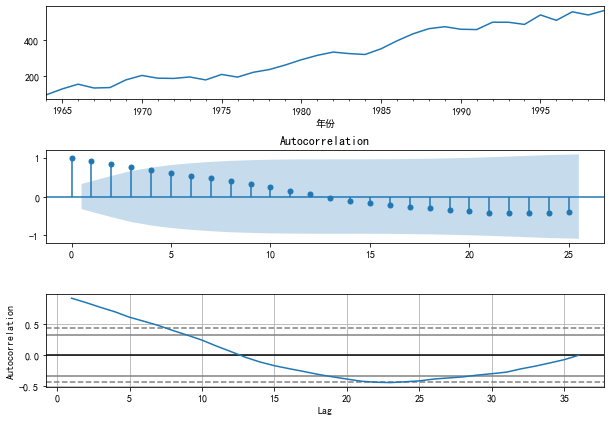

In [62]:
df14 = df14.sort_index(ascending=True)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(311)

df14["纱产量"].plot(ax=ax)

data = stattools.acf(df14["纱产量"], nlags=25)
print('自相关系数: \n', data)

ax = fig.add_subplot(312)
plot_acf(df14["纱产量"], lags=25,ax=ax)

ax = fig.add_subplot(313)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df14["纱产量"],ax=ax)
plt.subplots_adjust(hspace=0.55, wspace=0.35)
plt.show()

自相关系数: 
 [1.         0.89157378 0.77817897 0.62027149 0.48666361 0.4281481
 0.37606367 0.41477252 0.45425153 0.56181499 0.68655906 0.76855255
 0.84491352 0.74498717 0.63766681 0.4896786  0.36355484 0.30594908
 0.25490794 0.28742069 0.32056924 0.41651576 0.52871253 0.60335907
 0.67280097 0.58270128]


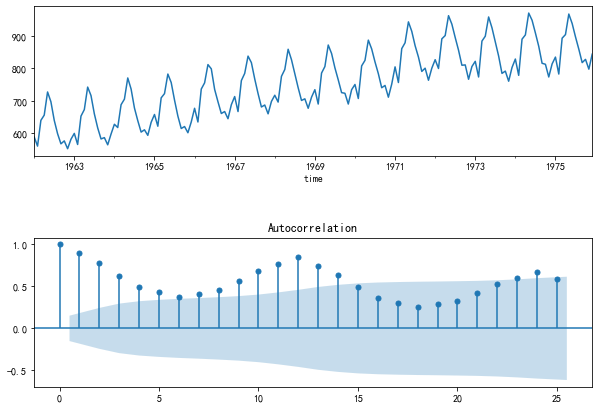

In [58]:

df15 = df15.sort_index(ascending=True)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(211)
df15["milk"].plot(ax=ax)
 
ax = fig.add_subplot(212)
data = stattools.acf(df15["milk"], nlags=25)
print('自相关系数: \n', data)
plot_acf(df15["milk"], lags=25,ax=ax)
plt.subplots_adjust(hspace=0.55, wspace=0.35)
plt.show()

自相关系数: 
 [ 1.         -0.17510866 -0.00354445  0.18026289  0.02305115 -0.16400488
  0.09865819 -0.02629177 -0.00324072 -0.02227864  0.05795321  0.03715004
 -0.10421802  0.10156002  0.00430771 -0.02694688 -0.04305828  0.04601851
 -0.08312665 -0.12878968  0.18177805 -0.06091924 -0.0499899   0.09846102
 -0.05124917 -0.0711775 ]


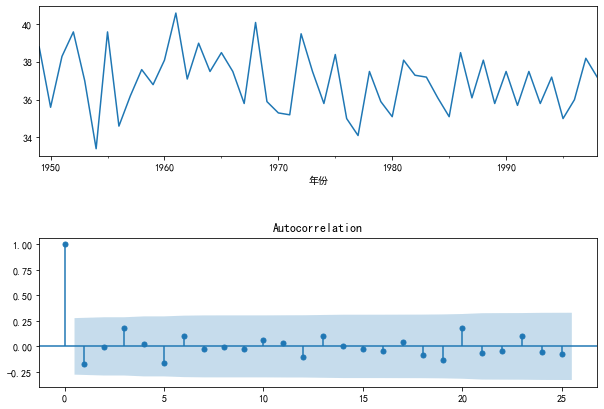

In [59]:
df16 = df16.sort_index(ascending=True)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(211)
df16["温度"].plot()
 
ax = fig.add_subplot(212)
data = stattools.acf(df16["温度"], nlags=25)
print('自相关系数: \n', data)
plot_acf(df16["温度"], lags=25,ax=ax)
plt.subplots_adjust(hspace=0.55, wspace=0.35)
plt.show()

# 纯随机性检验
## $Q_{BP}$和$Q_{LB}$统计量
https://mlln.cn/2017/10/26/python%E6%97%B6%E9%97%B4%E5%BA%8F%E5%88%97%E5%88%86%E6%9E%90-%E7%BA%AF%E9%9A%8F%E6%9C%BA%E6%80%A7%E6%A3%80%E9%AA%8C/

$H_0:\rho_1 = \rho_2 = ... =\rho_m = 0$

$H_1:至少存在某个\rho_k!= 0$

$当统计量大于χ^{2}_{1−α}(m)或者P值小于α时，则认为可以拒绝原假设，即认为该序列是非随机序列。$

<AxesSubplot:>

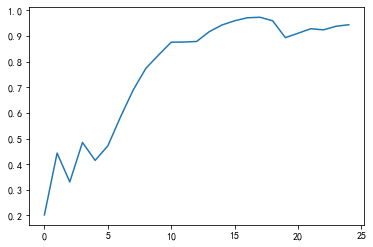

In [116]:
# stattools.q_stat(data,nobs=16)#Designed to be used with acf.
# https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html#statsmodels.tsa.stattools.acf
"""
For very long time series it is recommended to use fft convolution instead. 
When fft is False uses a simple, direct estimator of the autocovariances that only computes the first nlag + 1 values. 
This can be much faster when the time series is long and only a small number of autocovariances are needed.

If adjusted is true, the denominator for the autocovariance is adjusted for the loss of data.
"""
a,q_lb,p = stattools.acf(df16["温度"],qstat = True,nlags=25)

df_q = pd.DataFrame({"LB":q_lb,  "P":p})
df_q["P"].plot()

In [108]:
pd.DataFrame({
    "LB":[q_lb[5],q_lb[11]],
    "P":[p[5],p[11]]
},index=["延迟6期","延迟12期"])

,LB,P
延迟6期,5.584553,0.471297
延迟12期,6.711939,0.876048


# 综合

In [118]:
df17 = pd.read_excel('167330+应用时间序列分析案例数据/附录1.7.xls')
df17.index = pd.to_datetime(df17["年份"], format='%Y')
df17[:1]

,年份,定期储蓄
年份,,
1950-01-01,1950,83.5


自相关系数: 
 [ 1.          0.70245872  0.59538637  0.47791874  0.32807229  0.35578621
  0.3032736   0.29112523  0.16037288  0.05995387 -0.03747485 -0.0771132
 -0.03678528  0.00754769  0.00658703  0.01132204 -0.01905344 -0.05642765
 -0.03948761 -0.04927248 -0.03332983 -0.02636417 -0.04318071 -0.05588038
 -0.04201345 -0.03606389]


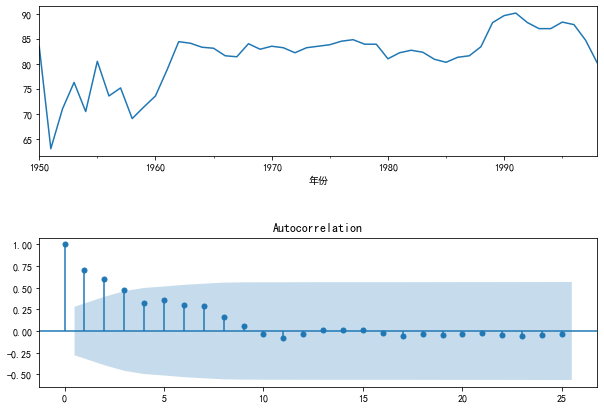

In [120]:
df17 = df17.sort_index(ascending=True)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(211)
df17["定期储蓄"].plot()
 
ax = fig.add_subplot(212)
data = stattools.acf(df17["定期储蓄"], nlags=25)
print('自相关系数: \n', data)
plot_acf(df17["定期储蓄"], lags=25,ax=ax)
plt.subplots_adjust(hspace=0.55, wspace=0.35)
plt.show()

In [ ]:
时序图显示始终在80%附近,波动平稳
自相关图表示延迟3阶后,自相关系数落入2倍标准差范围内，且自相关系数向零衰减速度非常快。
延迟8阶之后自相关系数即在零值附近波动。可以认为该序列平稳。

,LB,P
延迟6期,75.458366,3.088589e-14
延迟12期,82.865857,1.168870e-12


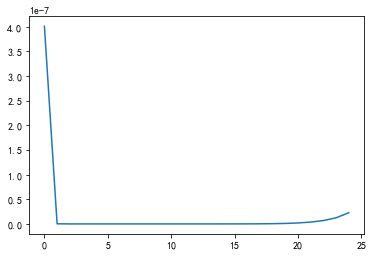

In [122]:
a,q_lb,p = stattools.acf(df17["定期储蓄"],qstat = True,nlags=25)

df_q = pd.DataFrame({"LB":q_lb,  "P":p})
df_q["P"].plot()
pd.DataFrame({
    "LB":[q_lb[5],q_lb[11]],
    "P":[p[5],p[11]]
},index=["延迟6期","延迟12期"])